In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('/content/drive/MyDrive/ML/EDA/autos.csv')
df.head()


,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.shape

(371528, 21)

In [4]:
# show all information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

## Handling Missing Values

In [5]:
print("Missing Values: ")
df.isnull().sum()

Missing Values: 


,0
index,0
dateCrawled,0
name,0
seller,0
offerType,0
price,0
abtest,0
vehicleType,37869
yearOfRegistration,0
gearbox,20209


<Axes: title={'center': 'Missing Values'}>

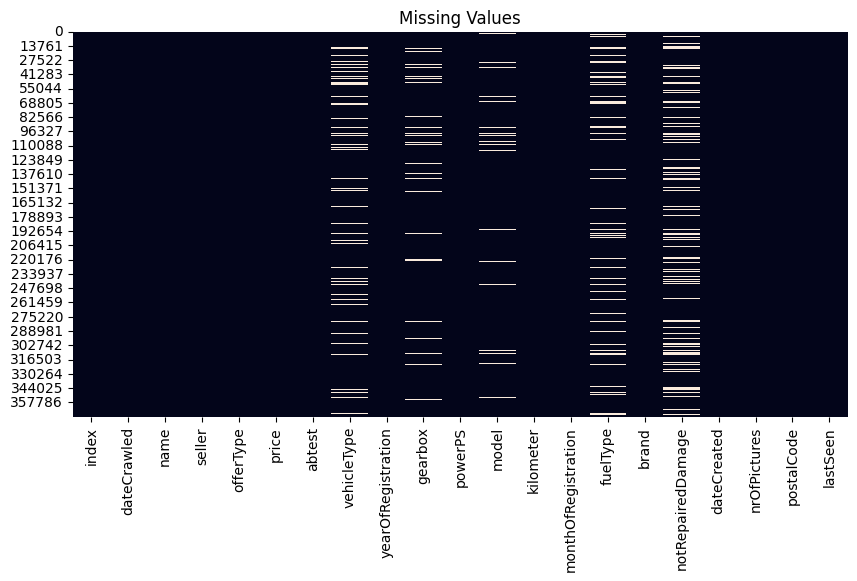

In [6]:
# Create figure that show the Missing Values

plt.figure(figsize=(10,5))
plt.title("Missing Values")
sns.heatmap(df.isnull(),cbar=False)

## Data Cleaning

In [7]:
# drop the irrelvent coloumns
df.drop(['index','gearbox','fuelType','postalCode','notRepairedDamage','monthOfRegistration','seller','powerPS','nrOfPictures','postalCode','lastSeen'],axis=1,inplace=True)

In [8]:
df.columns

Index(['dateCrawled', 'name', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'model', 'kilometer', 'brand', 'dateCreated'],
      dtype='object')

In [9]:
print("Missing Values: ")
df.isnull().sum()

Missing Values: 


,0
dateCrawled,0
name,0
offerType,0
price,0
abtest,0
vehicleType,37869
yearOfRegistration,0
model,20484
kilometer,0
brand,0


In [10]:
df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace=True)
df['model'].fillna(df['model'].mode()[0], inplace=True)

<ipython-input-10-7673750ceccf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace=True)
<ipython-input-10-7673750ceccf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [11]:
print("Missing Values: ")
df.isnull().sum()

Missing Values: 


,0
dateCrawled,0
name,0
offerType,0
price,0
abtest,0
vehicleType,0
yearOfRegistration,0
model,0
kilometer,0
brand,0


## Show some Graphical Representation of Data

In [12]:
"""plt.figure(figsize=(10,5))
sns.countplot(x="name", hue="price", data=df)
plt.title("Auto Name vs Price")
plt.xlabel("Name")
plt.ylabel("Price")
plt.legend(labels="Name,Price")
plt.show()"""

'plt.figure(figsize=(10,5))\nsns.countplot(x="name", hue="price", data=df)\nplt.title("Auto Name vs Price")\nplt.xlabel("Name")\nplt.ylabel("Price")\nplt.legend(labels="Name,Price")\nplt.show()'